In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn import ensemble, model_selection, preprocessing, tree, linear_model
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix


In [2]:
df = pd.read_json('data\\cleaned_df_numerical_columns_only.json')

In [3]:
df

,days_since_signup,completed_form,visited_pricing,registered_for_webinar,attended_webinar,converted,is_manager,acquisition_channel_cold_call,acquisition_channel_cold_email,acquisition_channel_organic_search,...,is_marketing,is_other,is_web_ind,is_financials_ind,is_furniture_ind,is_transportation_ind,is_manufacturing_ind,is_scandesign_ind,score_normalized,days_since_signup_normalized
0,18,1,1,0,0,1,0,0,0,1,...,1,0,1,0,0,0,0,0,0.473683,0.620690
1,3,1,0,1,0,0,1,0,0,1,...,0,1,1,0,0,0,0,0,0.443437,0.103448
10,27,1,1,0,0,0,1,0,0,1,...,0,1,1,0,0,0,0,0,0.406994,0.931034
100,0,1,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0.272440,0.000000
1000,19,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0.218143,0.655172
10000,3,1,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0.451578,0.103448
10001,25,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0.000000,0.862069
10002,14,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0.275327,0.482759
10003,22,1,1,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0.432260,0.758621
10004,16,0,0,0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0.320334,0.551724


In [ ]:
# columns = np.array(df.columns)

# fig, axs = plt.subplots(len(columns),1,figsize=(15,150))

# # df.T.iloc[0].name
# N=100000

# for i in range(len(columns)):
#     xs = df.T.iloc[i]
#     ys = df.converted
#     colors = np.random.rand(N)
#     axs[i].scatter(xs, ys, c=colors)
#     axs[i].set_xlabel(df.T.iloc[i].name)
#     axs[i].set_title(df.T.iloc[i].name)
#     plt.tight_layout()

In [ ]:
# df_rel_vals = df.drop(columns=['score', 'days_since_signup'])

# columns = np.array(df_rel_vals.columns)

# fig, axs = plt.subplots(1,1,figsize=(15,15))

# # df.T.iloc[0].name
# N=1000
# area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

# xs, ys = [], []

# for i in range(len(columns)):
#     xs = df_rel_vals.T.iloc[i]
#     ys = df_rel_vals.T.loc['score_normalized']
    
#     plt.scatter(xs, ys, s=area, alpha=0.5)
#     plt.tight_layout()
# # xs


### Random Forest

In [87]:
X = df.drop(columns=['converted'])
y = df.converted

In [88]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=.25, random_state=42)

In [89]:
rf1 = ensemble.RandomForestClassifier(random_state=42)
rf1.fit(X_train, y_train)
rf1.score(X_test, y_test)

cm = confusion_matrix(y_test, y_pred)

c:\users\mtpar\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [90]:
cm

array([[17612,  1698],
       [ 5147,   543]], dtype=int64)

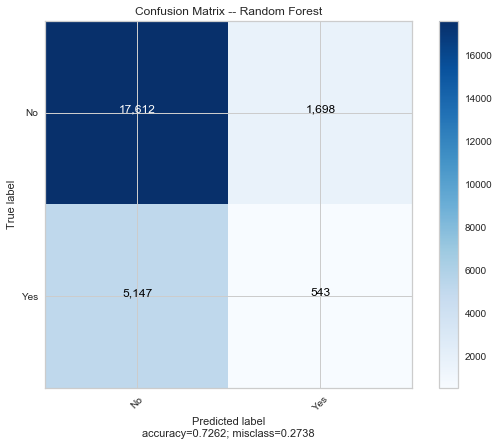

In [92]:
plot_confusion_matrix(cm           = cm, 
                      normalize    = False,
                      target_names = ['No', 'Yes'],
                      title        = "Confusion Matrix -- Random Forest")

##### ROC Curve

In [94]:
# fig, ax = plt.subplots(figsize=(10,10))
# roc_viz = ROCAUC(rf1)
# roc_viz.score(X_test,y_test)

# roc_viz.poof()

## Logistic Regression

In [95]:
X = df.drop(columns=['converted'])
y = df.converted

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=.25, random_state=0)

In [96]:
classifier = linear_model.LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

c:\users\mtpar\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [97]:
y_pred = classifier.predict(X_test)

In [98]:
classifier.score(X_test, y_test)

0.863

In [99]:
cm = confusion_matrix(y_test, y_pred)

In [100]:
cm

array([[19334,     0],
       [ 3425,  2241]], dtype=int64)

In [101]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


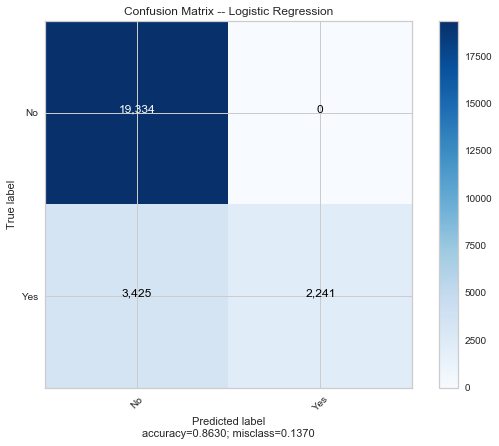

In [103]:
plot_confusion_matrix(cm           = cm, 
                      normalize    = False,
                      target_names = ['No', 'Yes'],
                      title        = "Confusion Matrix -- Logistic Regression")